In [2]:
import numpy as np
import scipy
from activ import load_data
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from activ.data_normalization import data_normalization
from scipy.spatial.distance import pdist
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
import h5py
import matplotlib
import matplotlib.pyplot as plt

In [3]:
rawdata = load_data(uoinmf=False)
raw_bm = rawdata.biomarkers
raw_oc = rawdata.outcomes

knum = 5
kf = StratifiedKFold(n_splits=knum)

In [4]:
raw_oc[:,32]

array([8., 5., 8., 8., 8., 7., 8., 8., 4., 8., 7., 5., 7., 8., 8., 8., 8.,
       8., 7., 7., 6., 7., 6., 7., 6., 8., 7., 5., 3., 6., 7., 6., 8., 3.,
       8., 3., 6., 8., 5., 7., 7., 7., 3., 8., 6., 5., 8., 5., 8., 6., 7.,
       8., 7., 7., 8., 6., 7., 8., 6., 8., 7., 7., 7., 5., 6., 6., 7., 6.,
       4., 5., 6., 7., 8., 7., 8., 6., 5., 8., 6., 7., 7., 8., 8., 7., 5.,
       8., 8., 8., 8., 8., 7., 8., 7., 8., 8., 7., 7., 5., 7., 7., 8., 6.,
       8., 7., 7., 7., 5., 7., 6., 6., 8., 7., 8., 8., 8., 6., 7., 8., 8.,
       6., 8., 8., 7., 7., 6., 7., 8., 6., 7., 5., 8., 7., 7., 5., 5., 7.,
       7., 6., 4., 5., 5., 7., 5., 7., 8., 8., 8., 7., 7., 7., 5., 7., 8.,
       7., 6., 6., 7., 6., 7., 6., 5., 5., 8., 8., 5., 8., 7., 5., 6., 5.,
       8., 7., 6., 7., 6., 7., 7., 6., 7., 6., 6., 7., 8., 8., 6., 8., 6.,
       5., 8., 6., 8., 7., 5., 5., 5., 7., 8., 5., 5., 8., 8., 6., 6., 7.,
       8., 8., 7., 8., 6., 8., 7., 7., 7., 6., 8., 8., 7., 7., 5., 6., 8.,
       5., 7., 7., 7., 6.

In [9]:
ks = list(range(2,20))
recon = np.zeros((len(ks), raw_bm.shape[0], raw_bm.shape[1]))

recon_err = np.zeros(len(ks))

for cv, (train_index, test_index) in enumerate(kf.split(raw_bm, raw_oc[:,32])):
    train, test = raw_bm[train_index], raw_bm[test_index]
    train_bm = train
    test_bm = test
    for ii,k in enumerate(ks):
        nmf = NMF(n_components = k, beta_loss='kullback-leibler', solver='mu', max_iter=400, init='random')
        W_fit = nmf.fit(train_bm)
        transform = nmf.transform(test_bm)
        inv_transform = nmf.inverse_transform(transform)
        recon[ii,test_index] = inv_transform

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(51, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(51, 235)
(51, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(51, 235)
(51, 235)
(51, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(51, 235)
(51, 235)
(51, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(51, 235)
(51, 235)
(51, 235)
(51, 235)
(51, 235)
(50, 235)
(50, 235)
(50, 235)
(50, 235)
(50, 235)
(50, 235)
(50, 235)
(50, 235)
(50, 235)
(50, 235)
(50, 235)
(50, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(50, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(50, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(50, 235)
(50, 235)
(50, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(50, 235)
(49, 235)
(49, 235)
(49, 235)
(49, 235)
(49, 235)
(49, 235)
(49, 235)
(49, 235)
(49, 235)
(49, 235)
(49, 235)
(49, 235)
(49, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(49, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(49, 235)
(49, 235)
(49, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(49, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)
(46, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(46, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(46, 235)
(46, 235)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [10]:
recon.shape, recon_err.shape

((18, 247, 235), (18,))

In [11]:

for ii,k in enumerate(ks):
    recon_err[ii] = np.linalg.norm(recon[ii]-raw_bm)


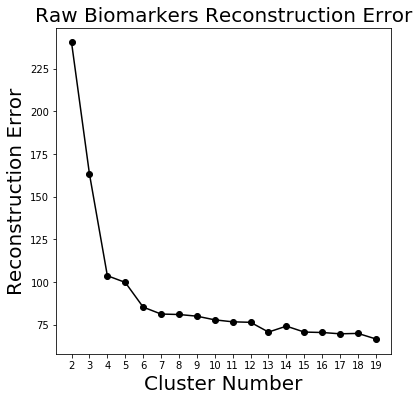

In [22]:
plt.figure(figsize=(6,6))
plt.plot(ks, recon_err, '-o', color='black')
plt.xticks(ks)
plt.xlabel('Cluster Number', fontsize=20)
plt.ylabel('Reconstruction Error', fontsize=20)
plt.title('Raw Biomarkers Reconstruction Error', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ misc/raw_bm_recon.pdf')

In [21]:
for cv, (train_index, test_index) in enumerate(kf.split(raw_oc, raw_oc[:,32])):
    train, test = raw_oc[train_index], raw_oc[test_index]
    print(train)

[[ 1.   1.   1.  ... -1.   2.5 -1. ]
 [ 2.   1.   1.  ... -2.5  1.5 -1.5]
 [ 2.   1.   1.  ... -3.5  1.8 -2. ]
 ...
 [ 1.   1.   2.  ...  0.   4.   1. ]
 [ 1.   2.   1.  ...  0.5  4.   1.5]
 [ 1.   2.   1.  ...  0.   4.   1. ]]
[[1.  2.  1.  ... 0.  2.3 0.5]
 [1.  2.  1.  ... 1.  2.  0.5]
 [1.  2.  1.  ... 0.5 4.  1. ]
 ...
 [1.  1.  2.  ... 0.  4.  1. ]
 [1.  2.  1.  ... 0.5 4.  1.5]
 [1.  2.  1.  ... 0.  4.  1. ]]
[[1.  2.  1.  ... 0.  2.3 0.5]
 [1.  2.  1.  ... 1.  2.  0.5]
 [1.  2.  1.  ... 0.5 4.  1. ]
 ...
 [1.  1.  2.  ... 0.  4.  1. ]
 [1.  2.  1.  ... 0.5 4.  1.5]
 [1.  2.  1.  ... 0.  4.  1. ]]
[[1.  2.  1.  ... 0.  2.3 0.5]
 [1.  2.  1.  ... 1.  2.  0.5]
 [1.  2.  1.  ... 0.5 4.  1. ]
 ...
 [1.  1.  2.  ... 0.  4.  1. ]
 [1.  2.  1.  ... 0.5 4.  1.5]
 [1.  2.  1.  ... 0.  4.  1. ]]
[[ 1.   2.   1.  ...  0.   2.3  0.5]
 [ 1.   2.   1.  ...  1.   2.   0.5]
 [ 1.   2.   1.  ...  0.5  4.   1. ]
 ...
 [ 1.   1.   1.  ...  0.   3.4  0.5]
 [ 1.   1.   2.  ... -1.5  3.3  0. ]
 [ 1. 

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [20]:
ks = list(range(2,20))
recon_oc = np.zeros((len(ks), raw_oc.shape[0], raw_oc.shape[1]))

recon_err_oc = np.zeros(len(ks))

for cv, (train_index, test_index) in enumerate(kf.split(raw_oc, raw_oc[:,32])):
    train, test = raw_oc[train_index], raw_oc[test_index]
    train_oc = train
    test_oc = test
    for ii,k in enumerate(ks):
        nmf = NMF(n_components = k, beta_loss='kullback-leibler', solver='mu', max_iter=400, init='random')
        W_fit = nmf.fit(train_oc)
        transform = nmf.transform(test_oc)
        inv_transform = nmf.inverse_transform(transform)
        recon_oc[ii,test_index] = inv_transform
        
for ii,k in enumerate(ks):
    recon_err_oc[ii] = np.linalg.norm(recon_oc[ii]-raw_oc)

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/scikit_learn-0.20.2-py3.7-macosx-10.7-x86_64.egg/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


ValueError: Negative values in data passed to NMF (input X)

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(ks, recon_err_oc, '-o', color='black')
plt.xticks(ks)
plt.xlabel('Cluster Number', fontsize=20)
plt.ylabel('Raw Biomarkers Reconstruction Error', fontsize=20)